In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

9. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage
based on the Auto data set.

In [3]:
data = pd.read_csv(r'C:\Users\shrik\Downloads\HW3 data\Auto.csv',index_col='name')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


(a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and
a 0 if mpg contains a value below its median.

In [4]:
median_mpg = data['mpg'].median()
data["mpg01"] = np.where(data['mpg'] > median_mpg,1, 0)
data.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1,0
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1,0
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1,0
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1,0
ford torino,17.0,8,302.0,140,3449,10.5,70,1,0


(b) Explore the data graphically in order to investigate the association between mpg01 and the other
features. Which of the other features seem most likely to be useful in predicting mpg01? Scatter-
plots and boxplots may be useful tools to answer this question. Describe your findings

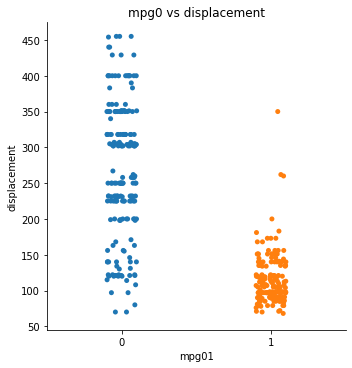

In [5]:
#figure,ax = plt.subplots()
#ax.scatter(data["displacement"],data["mpg0"],marker="*",c="red",s=30)
sns.catplot(x="mpg01", y="displacement", data=data).set(title='mpg0 vs displacement')

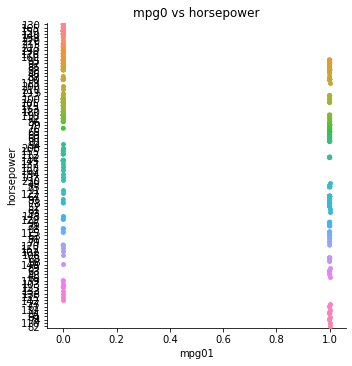

In [6]:
sns.catplot(x="mpg01", y="horsepower", data=data).set(title='mpg0 vs horsepower')

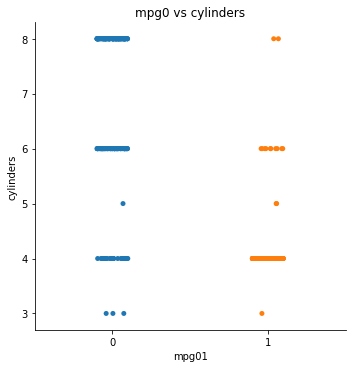

In [7]:
sns.catplot(x="mpg01", y="cylinders", data=data).set(title='mpg0 vs cylinders')

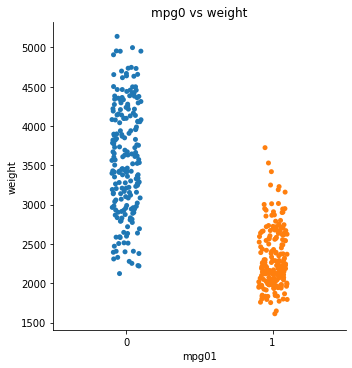

In [8]:
sns.catplot(x="mpg01", y="weight", data=data).set(title='mpg0 vs weight')

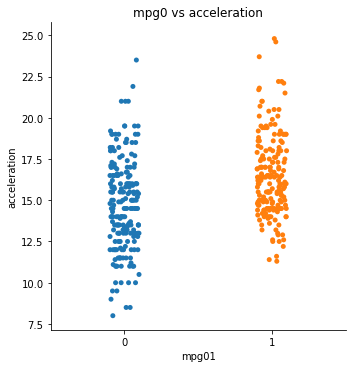

In [9]:
sns.catplot(x="mpg01", y="acceleration", data=data).set(title='mpg0 vs acceleration')

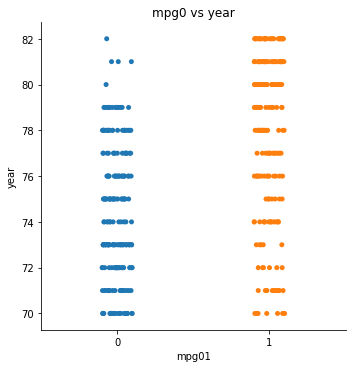

In [10]:
sns.catplot(x="mpg01", y="year", data=data).set(title='mpg0 vs year')

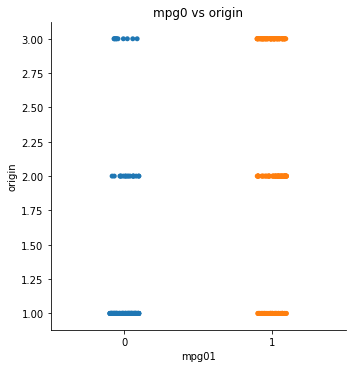

In [11]:
sns.catplot(x="mpg01", y="origin", data=data).set(title='mpg0 vs origin')

We can see an association betweent the mpg01 attribute and categories such as displacement, weight and acceleration. The rest of the attributes show no correlation. Our findings suggest that mileage increases with decrease in weight.

In [12]:
factors = ['displacement','acceleration','weight']
X = pd.DataFrame(data[factors].copy())
y = data['mpg01'].copy()


In [12]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.325364
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.530     
Dependent Variable: mpg0             AIC:              264.3388  
Date:               2022-02-05 23:51 BIC:              276.2906  
No. Observations:   397              Log-Likelihood:   -129.17   
Df Model:           2                LL-Null:          -274.90   
Df Residuals:       394              LLR p-value:      5.1492e-64
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
displacement  -0.0228    0.0053  -4.2902  0.0000  -0.0332  -0.0124
acceleration   0.3823    0.0617   6.1992  0.0000   0.2614   0.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)

(c) Split the data into a training set and a test set

In [14]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [16]:
confusion_matrix_1 = confusion_matrix(y_test, y_pred)
print(confusion_matrix_1)

[[28  8]
 [ 4 40]]


(d) Perform logistic regression on the training data in order to predict mpg01 using the variables that
seemed most associated with mpg01 in (b). What is the test error of the model obtained?

The result is telling us that we have 34+35 correct predictions and 4+7 incorrect predictions.  

As we know, the error rate =  (No. of False Positives + Number of False negatives)/Total number of observations

So we get Error rate = 12/80 = 0.15

(e) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only
the variables that seemed most associated with mpg01 in (b). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

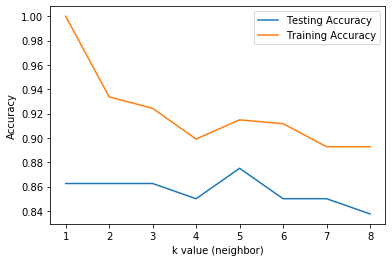

In [17]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
 
plt.legend()
plt.xlabel('k value (neighbor)')
plt.ylabel('Accuracy')
plt.show()

In [18]:
#We're taking k=5 since we know that this is the most accurate fit
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
y_pred2

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [19]:
knn.score(X_test, y_test)

0.875

In [20]:
confusion_matrix = confusion_matrix(y_test, y_pred2)
print(confusion_matrix)

[[31  5]
 [ 5 39]]


The result is telling us that we have 31+39 correct predictions and 5+5 incorrect predictions.  

As we know, the error rate =  (No. of False Positives + Number of False negatives)/Total number of observations

So we get Error rate = 10/80 = 0.125